In [278]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

# Q1 - Image Smoothing

In [279]:
def showImage(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.set_cmap('gray')
    plt.show()
    
    
def padding(k, orignal_image):
    new_size = 2*k - 1
    padding_size = (new_size - k)/2
    
    padded_image = orignal_image
    for i in range(int(padding_size)):
        padded_image = np.insert(padded_image, 0, np.zeros(len(padded_image[0])), 0)
        #print(padded_image)
        padded_image = np.insert(padded_image, len(padded_image), np.zeros(len(padded_image[0])), 0)
        #print(padded_image)
        padded_image = np.insert(padded_image, 0, np.zeros(len(padded_image)), 1)
        #print(padded_image)
        z = np.zeros((len(padded_image),1))
        padded_image = np.append(padded_image, z, 1)
        
    return padded_image


def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, (image.shape[0]), stepSize):
        for x in range(0, (image.shape[1]), stepSize):
            # yield the current window
            yield(x, y, image[y:y + windowSize[1], x:x + windowSize[0]])



def averaging(k, orignal_image, padded_image, filter_mask):
    
    # New blank image
    new_image = np.zeros((orignal_image.shape[0], orignal_image.shape[1]))
    
    # Call Sliding window func
    window = sliding_window(padded_image, 1, [k,k])
    
    row_pos = 0
    column_pos = 0
    
    # Iterate through the generator and the new_image matrix to fill in the values
    for w in window:
        #print(i)
        #print(row_pos)
        for row in range(row_pos, new_image.shape[0]):
            #print(column_pos)
            for column in range(column_pos, new_image.shape[1]):
                matrix = w[2]
                #print(matrix)
                if matrix.shape[0] == k and matrix.shape[1] == k:
                    #print(matrix)
                    mid_pos = math.floor(matrix.shape[0]/2)
                    averaged_matrix = np.multiply(filter_mask, matrix)
                    temp_sum = np.sum(averaged_matrix)
                    #print(temp_sum)
                    new_image[row, column] = temp_sum
                    if column_pos == new_image.shape[1]-1:
                        row_pos += 1
                        column_pos = 0
                    else:
                        row_pos = row
                        column_pos += 1 

                break;
            #row_pos = row
            break;
            
    return new_image

In [280]:
# Load an color image in grayscale
img = cv2.imread('images-project2/shapes-bw.jpg',0)
img_matrix = np.asmatrix(img)


# k = 3

In [281]:
k = 3
padded_image = padding(k,img_matrix)

# create averaging filter of k*k
filter_mask = np.ones((k, k))
mask_sum = np.sum(filter_mask)
filter_mask = np.true_divide(filter_mask, mask_sum)
    
new_image_3 = averaging(k, img_matrix, padded_image, filter_mask)
#showImage(img, 'Original Image')
#showImage(new_image_3, 'Image after 5*5 filter')

# k = 5

In [282]:
k = 5
padded_image = padding(k,img_matrix)

# create averaging filter of k*k
filter_mask = np.ones((k, k))
mask_sum = np.sum(filter_mask)
filter_mask = np.true_divide(filter_mask, mask_sum)

new_image_5 = averaging(k, img_matrix, padded_image, filter_mask)
#showImage(img, 'Original Image')
#showImage(new_image_5, 'Image after 5*5 filter')

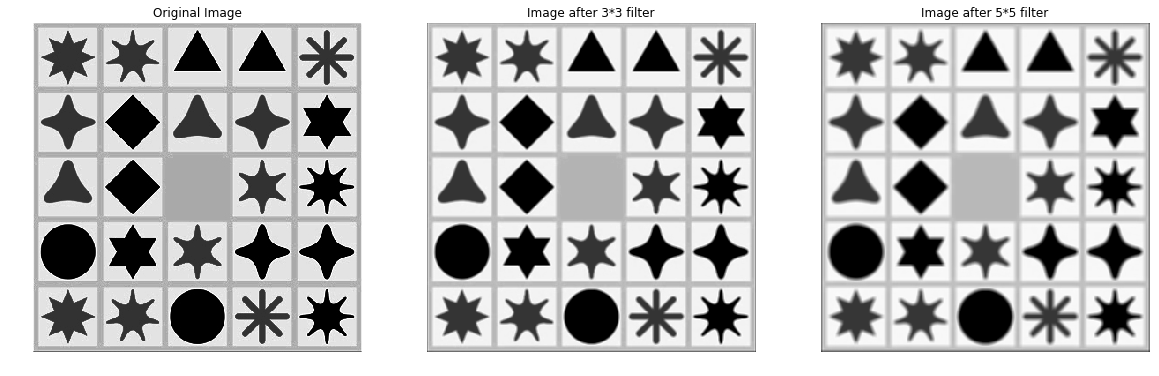

In [283]:
plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.set_cmap('gray')

#showImage(img_matrix3, 'Original Image')

plt.subplot(1, 3, 2)
plt.imshow(new_image_3)
plt.title('Image after 3*3 filter')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(1, 3, 3)
plt.imshow(new_image_5)
plt.title('Image after 5*5 filter')
plt.axis('off')
plt.set_cmap('gray')


plt.show()

# Q2 - Edge Detection

In [284]:
# Load an color image in grayscale
img2 = cv2.imread('images-project2/capitol.jpg',0)
img_matrix2 = np.asmatrix(img2)


In [285]:
k = 3
padded_image2 = padding(k,img_matrix2)

# create averaging filter of k*k
filter_mask = np.ones((k, k))
mask_sum = np.sum(filter_mask)
filter_mask = np.true_divide(filter_mask, mask_sum)

new_image2 = averaging(k, img_matrix2, padded_image2, filter_mask)
#showImage(img2, 'Original Image')
#showImage(new_image2, 'Image after 3*3 filter')

In [286]:
# dx
k = 3

# create derivative filter: sobel operator
filter_mask = np.matrix('-1 0 1; -2 0 2; -1 0 1')

new_image2_dx = averaging(k, img_matrix2, padded_image2, filter_mask)
#showImage(img2, 'Original Image')
#showImage(new_image2_dx, 'Image dx')
#print(new_image2_dx)

In [287]:
# dy
k = 3

# create derivative filter: sobel operator
filter_mask = np.matrix('-1 -2 -1; 0 0 0; 1 2 1')

new_image2_dy = averaging(k, img_matrix2, padded_image2, filter_mask)
#showImage(img2, 'Original Image')
#showImage(new_image2_dy, 'Image dy')

In [288]:
# edge map

new_image2_dx_square = np.square(new_image2_dx)
new_image2_dy_square = np.square(new_image2_dy)
edge_map2_squared_sum = np.add(new_image2_dx_square, new_image2_dy_square)
edge_map2 = np.sqrt(edge_map2_squared_sum)

#showImage(edge_map2, 'Image Edge Map')

In [289]:
# Orientation map

dx_by_dy = np.divide(new_image2_dx, new_image2_dy)
neg_dx_by_dy = np.dot(dx_by_dy, -1)
tan_inverse = np.degrees(np.arctan(neg_dx_by_dy))
"""for row in range(tan_inverse.shape[0]):
    for column in range(tan_inverse.shape[1]):
        if tan_inverse[row, column] < 0:
            tan_inverse[row, column] = tan_inverse[row, column] + 360"""
#showImage(tan_inverse, 'Image Orientation Map')
#print(tan_inverse)

/Users/uditagupta93/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/uditagupta93/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


'for row in range(tan_inverse.shape[0]):\n    for column in range(tan_inverse.shape[1]):\n        if tan_inverse[row, column] < 0:\n            tan_inverse[row, column] = tan_inverse[row, column] + 360'

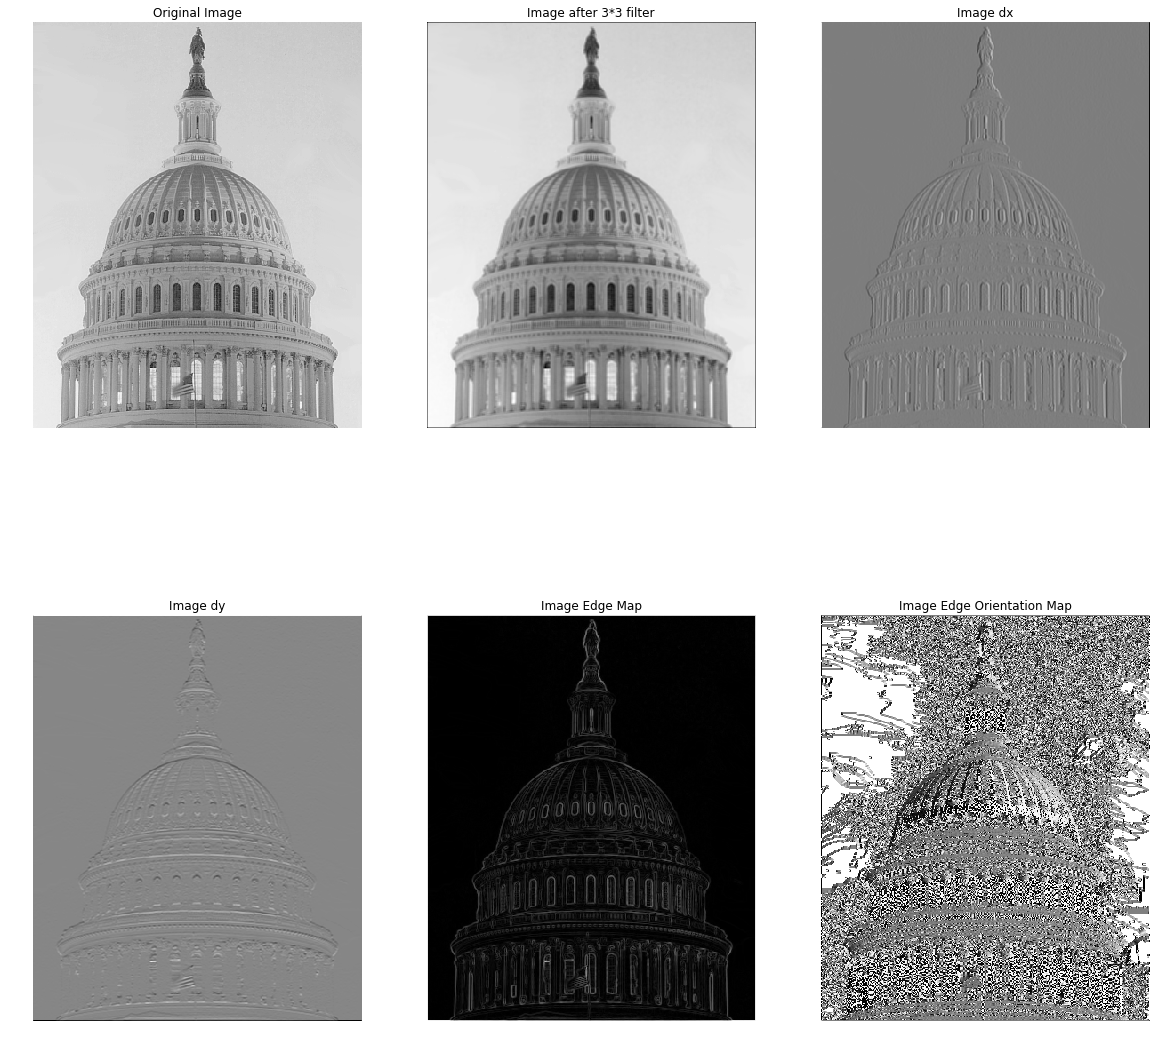

In [290]:
plt.figure(figsize=(20,20))

plt.subplot(2, 3, 1)
plt.imshow(img2)
plt.title('Original Image')
plt.axis('off')
plt.set_cmap('gray')

#showImage(img_matrix3, 'Original Image')

plt.subplot(2, 3, 2)
plt.imshow(new_image2)
plt.title('Image after 3*3 filter')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(2, 3, 3)
plt.imshow(new_image2_dx)
plt.title('Image dx')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(2, 3, 4)
plt.imshow(new_image2_dy)
plt.title('Image dy')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(2, 3, 5)
plt.imshow(edge_map2)
plt.title('Image Edge Map')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(2, 3, 6)
plt.imshow(tan_inverse)
plt.title('Image Edge Orientation Map')
plt.axis('off')
plt.set_cmap('gray')

plt.show()

# Q3 Template Matching

In [291]:
def zero_mean(original_matrix):
    mean = original_matrix.mean()
    mean_matrix = np.full((original_matrix.shape[0], original_matrix.shape[1]), mean)
    zero_mean_matrix = np.subtract(original_matrix, mean_matrix)
    return zero_mean_matrix

In [292]:
def padding_not_square(m, n, orignal_image):
    #new_size = 2*k - 1
    #padding_size = (new_size - k)/2
    
    padded_image = orignal_image
    if m != 1:
        for i in range(int((m-1)/2)):
            padded_image = np.insert(padded_image, 0, np.zeros(len(padded_image[0])), 0)
            #print(padded_image)
            padded_image = np.insert(padded_image, len(padded_image), np.zeros(len(padded_image[0])), 0)
            #print(padded_image)
            
    #padded_image = orignal_image
    if n != 1:
        for j in range(int((n-1)/2)):
            padded_image = np.insert(padded_image, 0, np.zeros(len(padded_image)), 1)
            #print(padded_image)
            z = np.zeros((len(padded_image),1))
            padded_image = np.append(padded_image, z, 1)
            #print(padded_image)
        
    return padded_image


In [293]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, (image.shape[0]), stepSize):
        for x in range(0, (image.shape[1]), stepSize):
            # yield the current window
            yield(x, y, image[y:y + windowSize[1], x:x + windowSize[0]])


def averaging_not_square(m, n, orignal_image, padded_image, w_matrix):
    
    # New blank image
    new_image_g = np.zeros((orignal_image.shape[0], orignal_image.shape[1]))
    new_image_c = np.zeros((orignal_image.shape[0], orignal_image.shape[1]))
    
    # Call Sliding window func
    window = sliding_window(padded_image, 1, [m,n])
    
    row_pos = 0
    column_pos = 0
    
    # Iterate through the generator and the new_image matrix to fill in the values
    for w in window:
        #print(w)
        #print(row_pos)
        for row in range(row_pos, new_image_g.shape[0]):
            #print(column_pos)
            for column in range(column_pos, new_image_g.shape[1]):
                matrix = w[2]
                #print(matrix)
                if matrix.shape[0] == m and matrix.shape[1] == n:
                    #print(matrix)
                    
                    f_matrix = zero_mean(matrix)
                    
                    
                    corelation_array = np.multiply(f_matrix, w_matrix)
                    temp_sum_g = np.sum(corelation_array)
                    #print(temp_sum)
                    new_image_g[row, column] = temp_sum_g
                    mag_w = np.linalg.norm(w_matrix)
                    mag_f = np.linalg.norm(f_matrix)
                    mag = mag_w * mag_f
                    corelation_array_mag = np.true_divide(corelation_array, mag)
                    temp_sum_c = np.sum(corelation_array_mag)
                    new_image_c[row, column] = temp_sum_c
                    
                    
                    if column_pos == new_image_g.shape[1]-1:
                        row_pos += 1
                        column_pos = 0
                    else:
                        row_pos = row
                        column_pos += 1 

                break;
            #row_pos = row
            break;
            
    return new_image_g, new_image_c

In [294]:
# Load an color image in grayscale
img3 = cv2.imread('images-project2/shapes-bw.jpg',0)
img_matrix3 = np.asmatrix(img3)

#Load template
template = cv2.imread('images-project2/totem_template.jpg',0)
template_matrix = np.asmatrix(template)

In [295]:
w_matrix = zero_mean(template_matrix)
#print(w_matrix)

In [296]:
#Padding
m = w_matrix.shape[0]
n = w_matrix.shape[1]
#print(m, n)

if m == n:
    padded_image3 = padding(m, img_matrix3)
else:
    padded_image3 = padding_not_square(m, n, img_matrix3)
    
#print(padded_image3)

In [297]:
new_image3_g, new_image3_c= averaging_not_square(m, n, img_matrix3, padded_image3, w_matrix)
"""#showImage(img_matrix3, 'Original Image')
showImage(new_image3_g, 'Image g')
showImage(new_image3_c, 'Image c')"""


"#showImage(img_matrix3, 'Original Image')\nshowImage(new_image3_g, 'Image g')\nshowImage(new_image3_c, 'Image c')"

In [298]:
# finding threshold
def find_threshold(matrix):
    max_threshold = matrix.max()
    #print(max_threshold)

    min_threshold = matrix.min()
    #print(min_threshold)

    matrix_flatten = matrix.flatten()
    matrix_flatten = matrix_flatten.tolist()
    matrix_flatten = sorted(matrix_flatten)
    #print(len(matrix_flatten))
    top_values = matrix_flatten[-100:]

    sum =0
    for val in top_values:
        sum += val
    threshold_val = float(sum/len(top_values))
    return threshold_val

# Apply thrsholding
def apply_threshold(threshold, matrix):
    new_image_threshold = matrix.copy()

    for row in range(matrix.shape[0]):
        for column in range(matrix.shape[1]):
            if new_image_threshold[row, column] < threshold:
                new_image_threshold[row, column] = 0
    return new_image_threshold



In [299]:
# Apply thrsholding

threshold = find_threshold(new_image3_c)
#print(threshold)

new_image_c_threshold = apply_threshold(threshold, new_image3_c)
#showImage(img_matrix3, 'Original Image')
#showImage(new_image3_g, 'Image g')
#showImage(new_image_c_threshold, 'Image c after threshold')

In [300]:
# Laplacian filter
k = 3

filter_mask = np.matrix('0 -1 0; -1 4 -1; 0 -1 0')
padded_image_laplacian = padding(k,new_image3_c)
new_image3_laplacian = averaging(k, new_image3_c, padded_image_laplacian, filter_mask)
#showImage(img2, 'Original Image')
#showImage(new_image3_laplacian, 'Image after Laplacian')

In [301]:
# LoG filter
k = 5

#filter_mask = np.matrix('0 0 -1 0 0; 0 -1 -2 -1 0; -1 -2 -16 -2 -1; 0 -1 -2 -1 0; 0 0 -1 0 0')
filter_mask = np.matrix('0 0 1 0 0; 0 1 2 1 0; 1 2 16 2 1; 0 1 2 1 0; 0 0 1 0 0')
padded_image_log = padding(k,new_image3_c)
new_image3_log = averaging(k, new_image3_c, padded_image_log, filter_mask)
#showImage(img2, 'Original Image')
#showImage(new_image3_log, 'Image after LoG')

In [302]:
# thresholding on the LoG output
threshold_log = find_threshold(new_image3_log)
print(threshold_log)

new_image_log_threshold = apply_threshold(threshold_log, new_image3_log)
#showImage(img_matrix3, 'Original Image')
#showImage(new_image3_g, 'Image g')
#showImage(new_image_log_threshold, 'Image LoG after threshold')


28.240898424984138


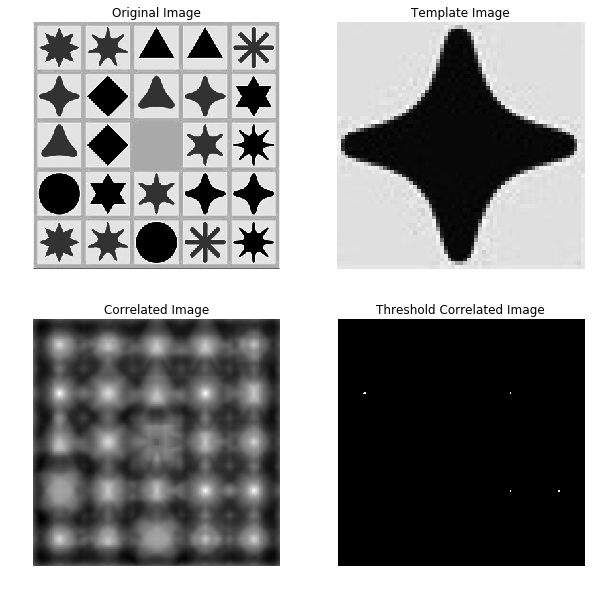

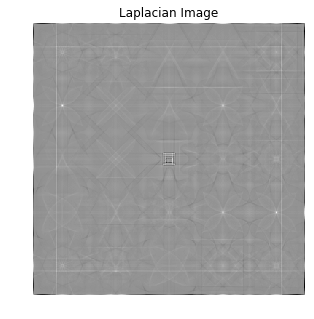

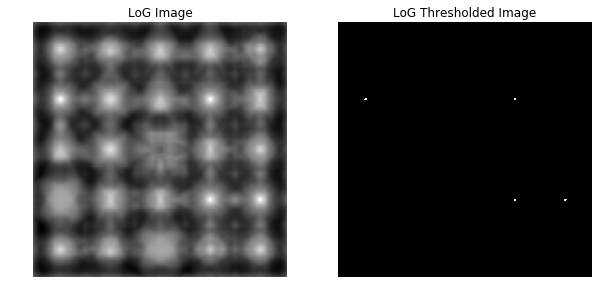

In [303]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(img_matrix3)
plt.title('Original Image')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(2, 2, 2)
plt.imshow(template_matrix)
plt.title('Template Image')
plt.axis('off')
plt.set_cmap('gray')

#showImage(img_matrix3, 'Original Image')

plt.subplot(2, 2, 3)
plt.imshow(new_image3_c)
plt.title('Correlated Image')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(2, 2, 4)
plt.imshow(new_image_c_threshold)
plt.title('Threshold Correlated Image')
plt.axis('off')
plt.set_cmap('gray')

plt.show()


plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
plt.imshow(new_image3_laplacian)
plt.title('Laplacian Image')
plt.axis('off')
plt.set_cmap('gray')

plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(new_image3_log)
plt.title('LoG Image')
plt.axis('off')
plt.set_cmap('gray')

plt.subplot(1, 2, 2)
plt.imshow(new_image_log_threshold)
plt.title('LoG Thresholded Image')
plt.axis('off')
plt.set_cmap('gray')

plt.show()